In [1]:
import json
import warnings

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid', {'legend.frameon': True, 'font.family': 'sans-serif'})

In [2]:
def process_result(d):
    """
    Process the saved results, collect the results into a single
    numpy array, sorted by the value of epsilon.
    """
    temp = {}
    for k, v in d.items():
        temp[float(k)] = v
    sorted_key = sorted(temp.keys())
    
    return {metric: np.array([temp[i][metric] for i in sorted_key])
            for metric in ['space', 'run_time', 'op_count', 'beta']}

In [3]:
# The array used as x-values for the plots
range10 = np.arange(0.1, 1.1, 0.1)

# Load the results
with open('results_100000_6000.json') as f:
    d = json.load(f)
    results = process_result(d)
    
results

{'beta': array([106.71895716, 114.47545997, 112.45540695, 111.12006826,
        129.74633789, 175.92186044, 201.59939004, 198.35929037,
        169.83563041, 256.        ]),
 'op_count': array([132676, 132676, 132676, 132676, 132676, 132676, 132676, 132676,
        132676, 132676]),
 'run_time': array([231140.09 , 146415.842, 105171.485,  89905.369,  79956.134,
         75459.471,  71039.769,  66561.146,  61488.895,  54480.316]),
 'space': array([158598920,  86506368,  61827144,  49789232,  42554304,  39220672,
         35564576,  33554192,  30545328,  28534216])}

In [9]:
def invert_func(x, a, b):
    return a / x + b

def plot_metric(ydata, ylabel, yscale='linear', fit_inverse=True, usetex=False):
    plt.rc('text', usetex=usetex)
    fig = plt.figure(figsize=(14, 7))
    
    ax = fig.add_subplot(111)
    ax.set_yscale(yscale)
    plt.xticks(range10, fontsize=20)
    plt.xlabel(r'\varepsilon' if usetex else 'ε', fontsize=22)
    
    plt.yticks(fontsize=20)
    
    plt.plot(range10, ydata, label=ylabel)
    
    if fit_inverse:
        popt, pcov = curve_fit(invert_func, range10, ydata)
        plt.plot(range10, invert_func(range10, *popt), label='fit line')
    
    plt.legend(fontsize=20)

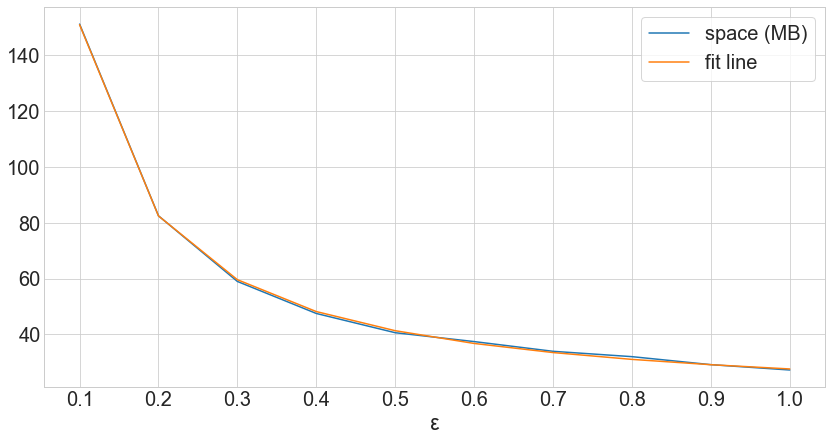

In [5]:
plot_metric(results['space'] / 1048576, 'space (MB)')

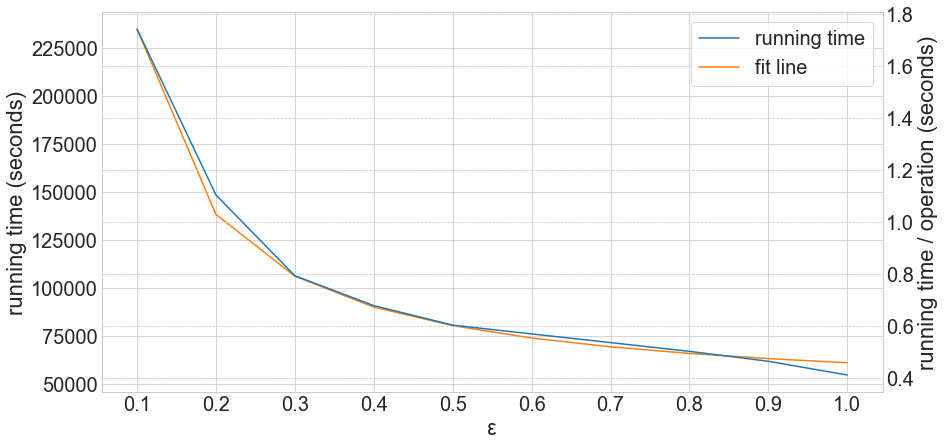

In [6]:
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14, 7))

plt.xticks(range10, fontsize=20)
plt.xlabel('ε', fontsize=22)

ax1 = fig.add_subplot(111)
plt.yticks(fontsize=20)

ax2 = ax1.twinx()
ax2.yaxis.grid(linestyle='--')
plt.yticks(fontsize=20)

ax1.set_ylabel('running time (seconds)', fontsize=22)
fit_line = ax1.plot(range10, results['run_time'], label='', linewidth=0)

popt, pcov = curve_fit(invert_func, range10, results['run_time'])
plot1 = ax1.plot(range10, invert_func(range10, *popt), label='fit line')

ax2.set_ylabel('running time / operation (seconds)', fontsize=22)
plot2 = ax2.plot(range10, results['run_time'] / results['op_count'], label='running time')

plots = fit_line + plot2 + plot1
labels = [l.get_label() for l in plots]
plt.legend(plots, labels, fontsize=20)

plt.show()

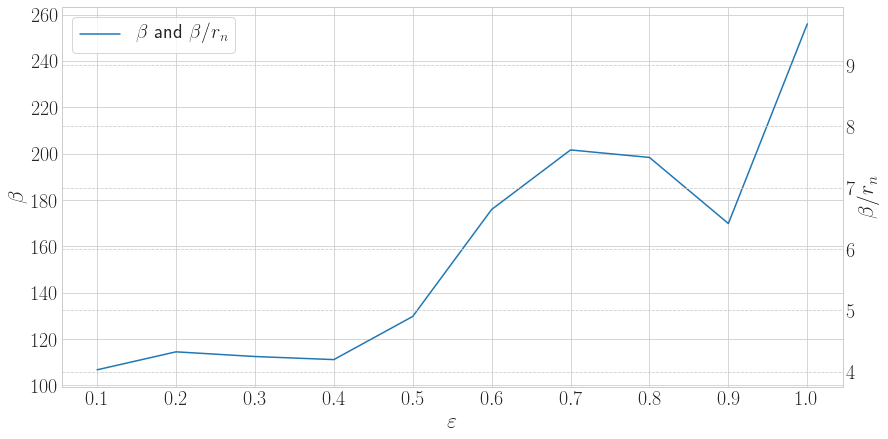

In [7]:
plt.rc('text', usetex=True)
fig = plt.figure(figsize=(14, 7))

plt.xticks(range10, fontsize=20)
plt.xlabel(r'\varepsilon', fontsize=22)

ax1 = fig.add_subplot(111)
plt.yticks(fontsize=20)

ax2 = ax1.twinx()
ax2.yaxis.grid(linestyle='--')
plt.yticks(fontsize=20)

ax1.set_ylabel(r'\beta', fontsize=22)
ax1.plot(range10, results['beta'], label=r'$\beta$ and $\beta/r_n$')

mn, mx = ax1.get_ylim()
ax2.set_ylim(mn / 26.4708, mx / 26.4708)
ax2.set_ylabel(r'\beta / r_n', fontsize=22)

ax1.legend(fontsize=20)
plt.show()

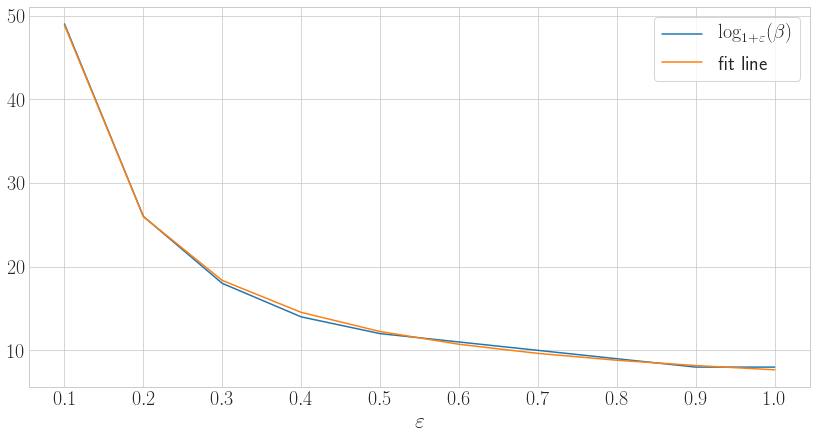

In [10]:
plot_metric(np.log(results['beta']) / np.log(np.arange(1.1, 2.1, 0.1)), r'\log_{1 + \varepsilon}(\beta)', usetex=True)

In [13]:
sorted(np.log(results['beta']))

[4.6701988104119225,
 4.71061131269698,
 4.7225567604148395,
 4.740360476642819,
 4.865581297297973,
 5.1348310893791576,
 5.170039921703092,
 5.290079984119071,
 5.3062825106217035,
 5.545177444479562]